# D200, Problem Set 1: Introduction to PyTorch

Due: 5 Feb 2026 [here](https://classroom.github.com/a/kQo2Kl0l) in
groups of up to 2 (solo or one partner).

Stefan Bucher

This problem set introduces PyTorch, the deep learning framework we will
use throughout the course. You will learn to work with tensors, use
automatic differentiation, implement a training loop, and build a neural
network.

# Problem 1: Tensors and Automatic Differentiation

PyTorch tensors are similar to NumPy arrays but can run on GPUs and
support automatic differentiation. In this problem, you will explore
tensor operations and PyTorch’s autograd system.

**(1a)** Create the following tensors and perform the specified
operations:

1.  Create a tensor `a` containing the values \[1.0, 2.0, 3.0, 4.0,
    5.0\]
2.  Create a 3×3 tensor `B` filled with ones
3.  Reshape `a` to a 5×1 column vector
4.  Compute the element-wise square of `a`
5.  Compute the matrix product of `B` with itself

**Solution:**

In [2]:
# 1. Create tensor a
a = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
print(f"a = {a}")

# 2. Create 3x3 tensor of ones
B = torch.ones(3, 3)
print(f"B = \n{B}")

# 3. Reshape a to column vector
a_col = a.view(5, 1)  # or a.reshape(5, 1)
print(f"a reshaped = \n{a_col}")

# 4. Element-wise square
a_squared = a ** 2  # or torch.square(a)
print(f"a squared = {a_squared}")

# 5. Matrix product
B_squared = B @ B  # or torch.mm(B, B)
print(f"B @ B = \n{B_squared}")

a = tensor([1., 2., 3., 4., 5.])
B = 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
a reshaped = 
tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])
a squared = tensor([ 1.,  4.,  9., 16., 25.])
B @ B = 
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

**(1b)** PyTorch’s automatic differentiation (autograd) computes
gradients automatically. Consider the function $f(x) = x^2 + 3x + 1$.

1.  Compute $\frac{df}{dx}$ analytically. What is its value at $x = 2$?
2.  Create a tensor `x = torch.tensor([2.0], requires_grad=True)` and
    compute `y = x**2 + 3*x + 1`
3.  Call `y.backward()` to compute the gradient, then print `x.grad`
4.  Verify that PyTorch’s gradient matches your analytical result

**Solution:**

Analytically: $\frac{df}{dx} = 2x + 3$. At $x = 2$:
$\frac{df}{dx} = 2(2) + 3 = 7$.

In [3]:
# Create tensor with gradient tracking
x = torch.tensor([2.0], requires_grad=True)

# Forward pass
y = x**2 + 3*x + 1
print(f"y = {y.item()}")

# Backward pass (compute gradients)
y.backward()

# Check gradient
print(f"dy/dx at x=2: {x.grad.item()}")

y = 11.0
dy/dx at x=2: 7.0

The gradient computed by PyTorch (7.0) matches our analytical result.

**(1c)** Consider the function $g(x, y) = x^2 y + y^3$.

1.  Compute $\frac{\partial g}{\partial x}$ and
    $\frac{\partial g}{\partial y}$ analytically
2.  Use PyTorch to compute both partial derivatives at $(x, y) = (1, 2)$
3.  Verify the results match

**Solution:**

Analytically:

-   $\frac{\partial g}{\partial x} = 2xy$. At $(1, 2)$: $2(1)(2) = 4$
-   $\frac{\partial g}{\partial y} = x^2 + 3y^2$. At $(1, 2)$:
    $1 + 3(4) = 13$

In [4]:
x = torch.tensor([1.0], requires_grad=True)
y = torch.tensor([2.0], requires_grad=True)

g = x**2 * y + y**3
g.backward()

print(f"dg/dx at (1,2): {x.grad.item()} (analytical: {2*1*2})")
print(f"dg/dy at (1,2): {y.grad.item()} (analytical: {1 + 3*4})")

dg/dx at (1,2): 4.0 (analytical: 4)
dg/dy at (1,2): 13.0 (analytical: 13)

**Note:** The `.grad` attribute stores the gradient of whatever tensor
you call `.backward()` on. If we compose functions, PyTorch applies the
chain rule automatically:

In [5]:
x = torch.tensor([1.0], requires_grad=True)
y = torch.tensor([2.0], requires_grad=True)

g = x**2 * y + y**3
h = g**2  # h is a function of g

h.backward()

# x.grad now contains dh/dx = (dh/dg) * (dg/dx)
# dh/dg = 2g = 2(1*2 + 8) = 20
# dg/dx = 2xy = 4
# dh/dx = 20 * 4 = 80
print(f"dh/dx at (1,2): {x.grad.item()} (analytical: {2*(1*2 + 8) * 2*1*2})")

dh/dx at (1,2): 80.0 (analytical: 80)

# Problem 2: Linear Regression in PyTorch

In this problem, you will implement linear regression using PyTorch’s
neural network modules and optimizers.

In [6]:
# Generate synthetic data for linear regression
n_samples = 100
true_weight = 3.5
true_bias = 1.2

X = torch.randn(n_samples, 1)
y = true_weight * X + true_bias + 0.3 * torch.randn(n_samples, 1)

**(2a)** Visualize the data, then create a linear regression model using
`nn.Linear`. This module implements $\hat{y} = Wx + b$ where $W$
(weight) and $b$ (bias) are learnable parameters.

1.  Create a model: `model = nn.Linear(in_features=1, out_features=1)`
2.  Print the initial (random) weight and bias using `model.weight` and
    `model.bias`
3.  Make predictions on `X` using `model(X)` and plot them alongside the
    true data

**Solution:**

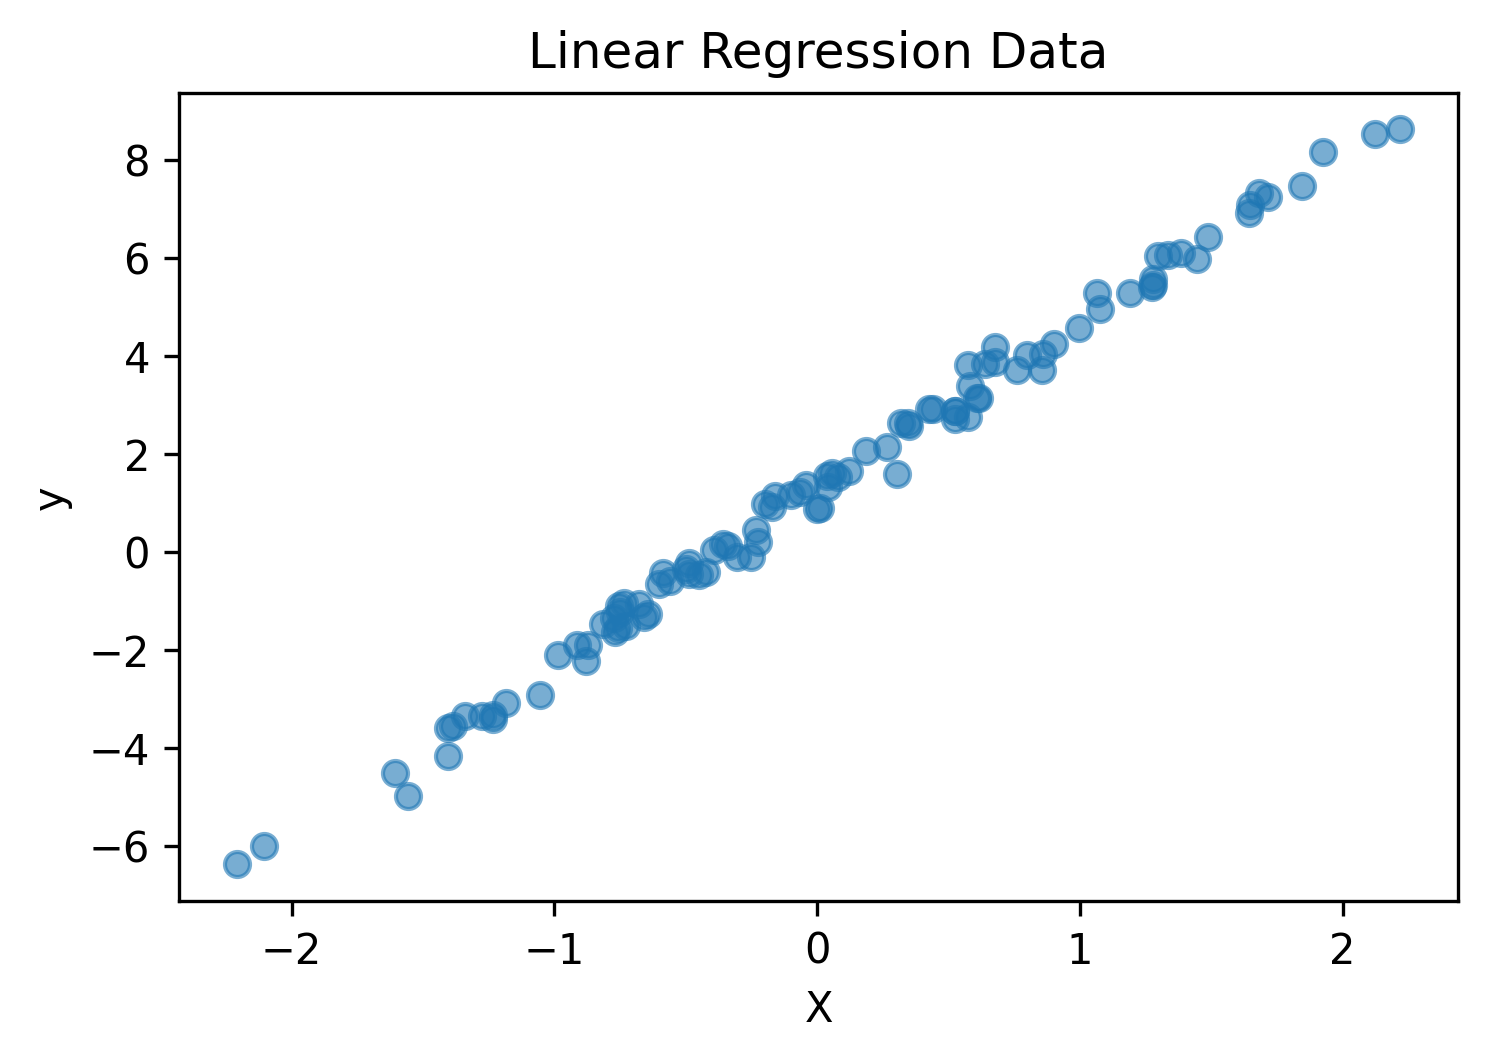

Initial weight: 0.4801
Initial bias: 0.8415

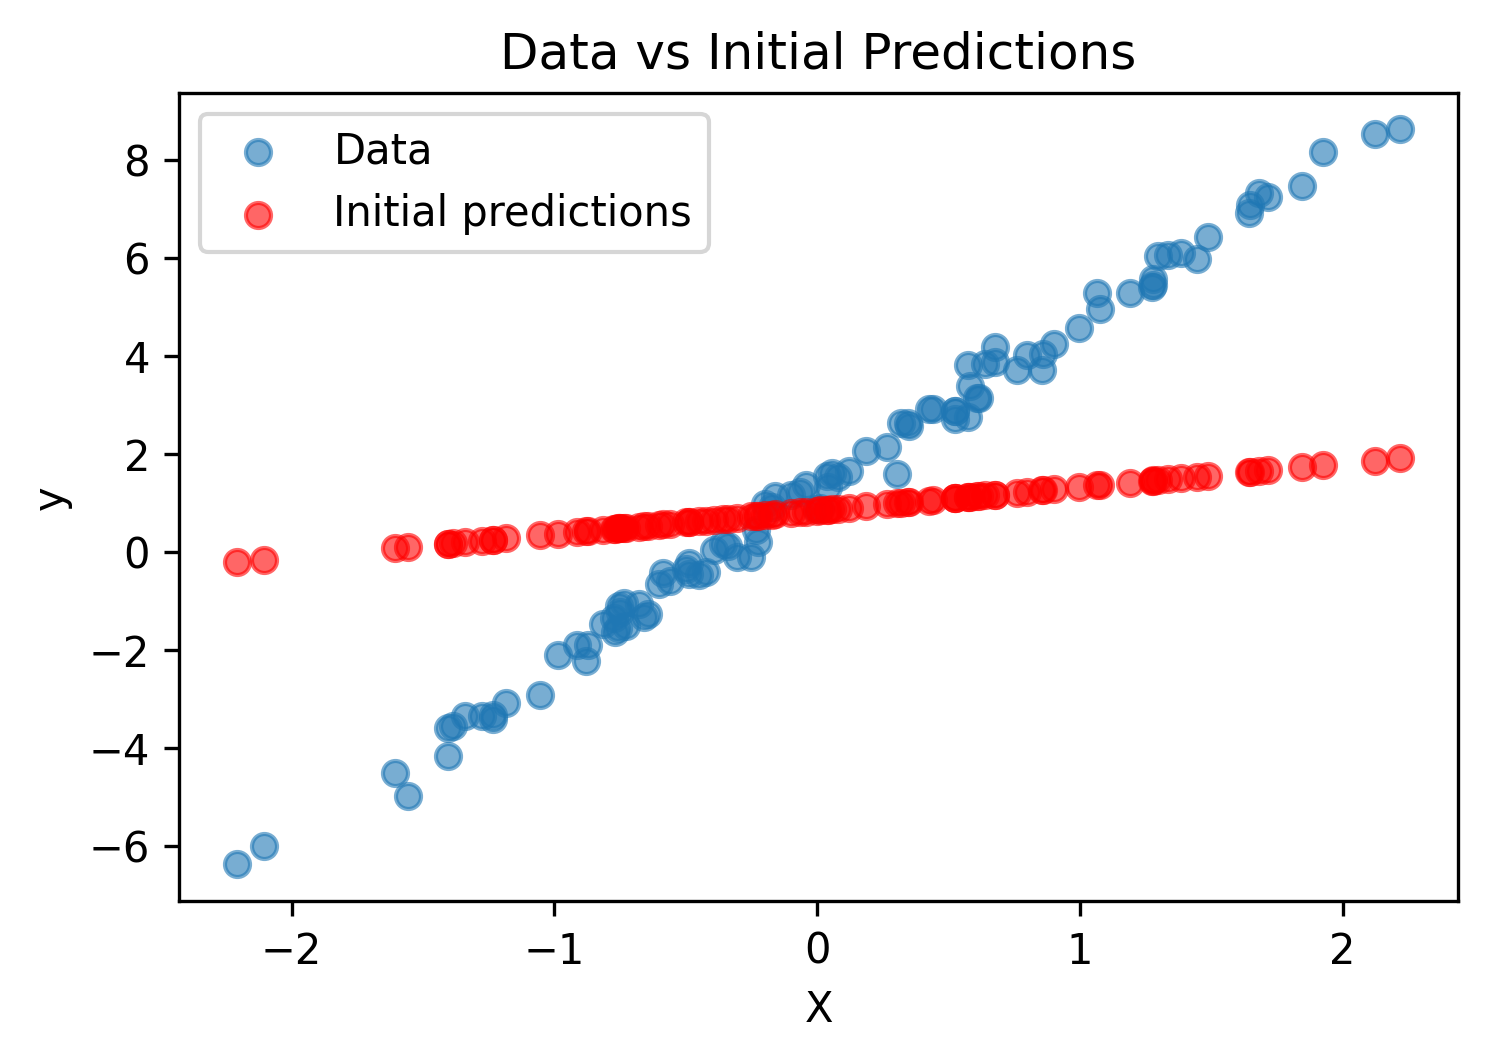

In [7]:
# Visualize the data
plt.scatter(X.numpy(), y.numpy(), alpha=0.6)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Data')
plt.show()

# Create linear model
model = nn.Linear(in_features=1, out_features=1)

# Print initial parameters
print(f"Initial weight: {model.weight.item():.4f}")
print(f"Initial bias: {model.bias.item():.4f}")

# Make predictions
with torch.no_grad():
    y_pred_init = model(X)

# Plot
plt.scatter(X.numpy(), y.numpy(), alpha=0.6, label='Data')
plt.scatter(X.numpy(), y_pred_init.numpy(), alpha=0.6, label='Initial predictions', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Data vs Initial Predictions')
plt.show()

**(2b)** Implement the training loop to fit the model. Use:

-   Loss function: `nn.MSELoss()`
-   Optimizer: `optim.SGD(model.parameters(), lr=0.1)`
-   Train for 100 epochs

The training loop should follow this pattern:

``` python
for epoch in range(n_epochs):
    # 1. Forward pass: compute predictions
    # 2. Compute loss
    # 3. Zero gradients: optimizer.zero_grad()
    # 4. Backward pass: loss.backward()
    # 5. Update parameters: optimizer.step()
```

Store the loss at each epoch and plot the loss curve.

**Solution:**

Epoch 20: Loss = 0.0724
Epoch 40: Loss = 0.0702
Epoch 60: Loss = 0.0702
Epoch 80: Loss = 0.0702
Epoch 100: Loss = 0.0702

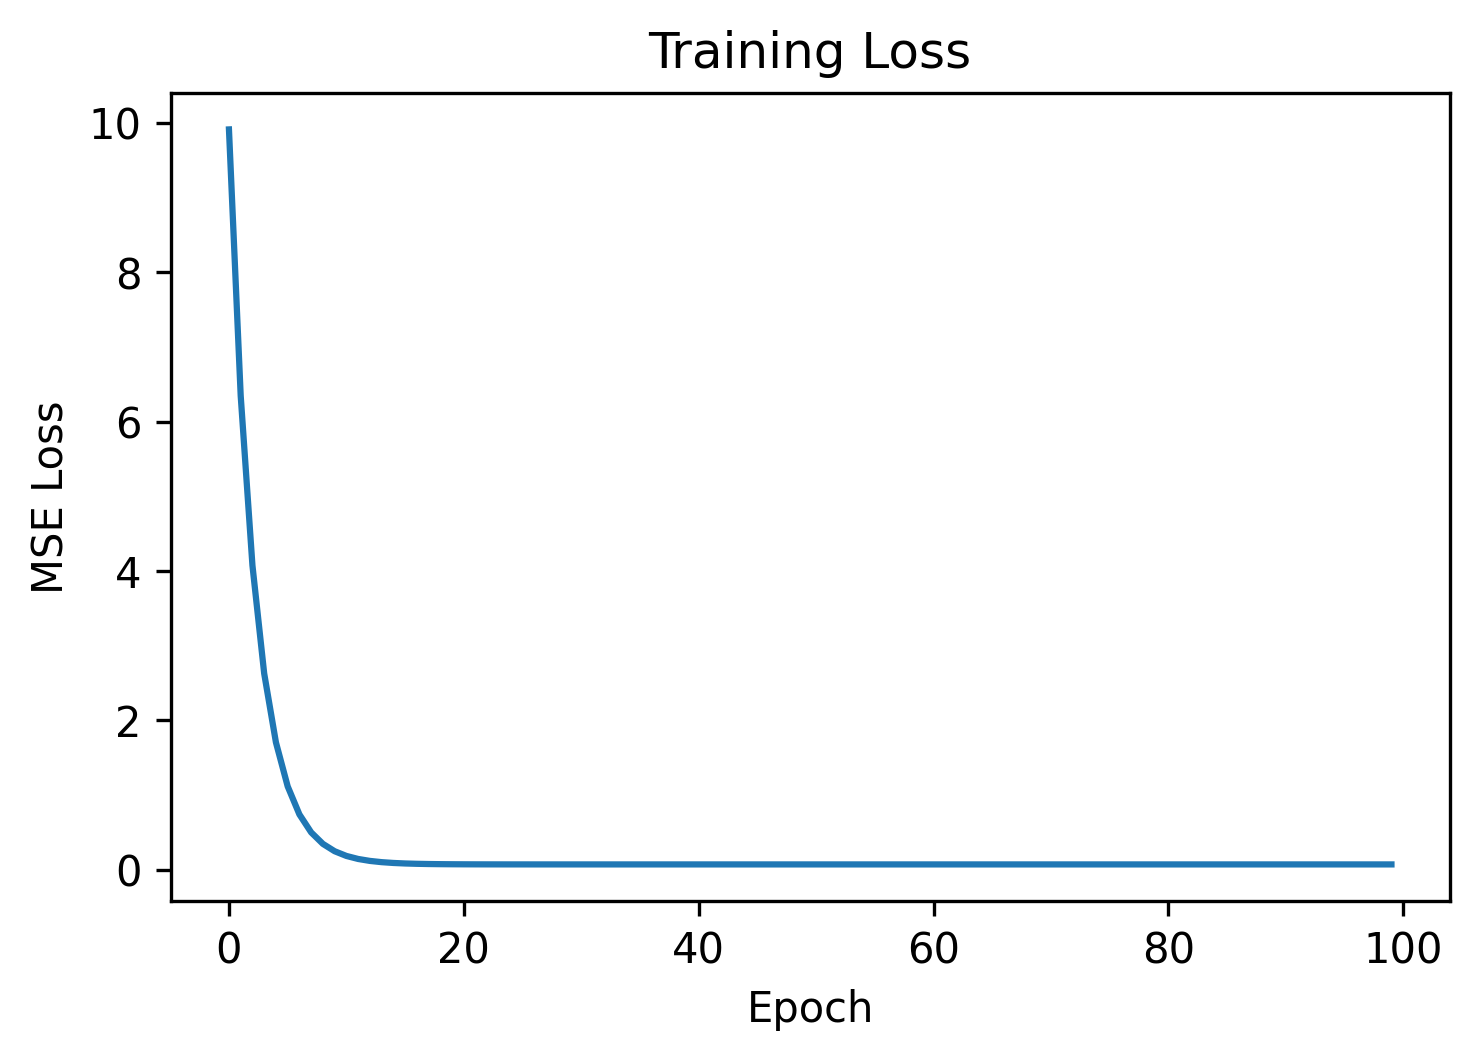

In [8]:
# Reset model
model = nn.Linear(1, 1)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
n_epochs = 100
losses = []

for epoch in range(n_epochs):
    # Forward pass
    y_pred = model(X)
    
    # Compute loss
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    
    # Zero gradients
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    
    # Update parameters
    optimizer.step()
    
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

# Plot loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.show()

**(2c)** After training:

1.  Print the learned weight and bias
2.  Compute the analytical OLS solution:
    $\hat{\beta} = (X^\top X)^{-1} X^\top y$ (hint: add a column of ones
    for the intercept)
3.  Compare the SGD estimates to both the OLS solution and the true
    values (3.5 and 1.2)
4.  Plot the learned regression line alongside the data

**Solution:**

Method           Weight       Bias
----------------------------------
True             3.5000     1.2000
OLS              3.5035     1.2107
SGD              3.5035     1.2107

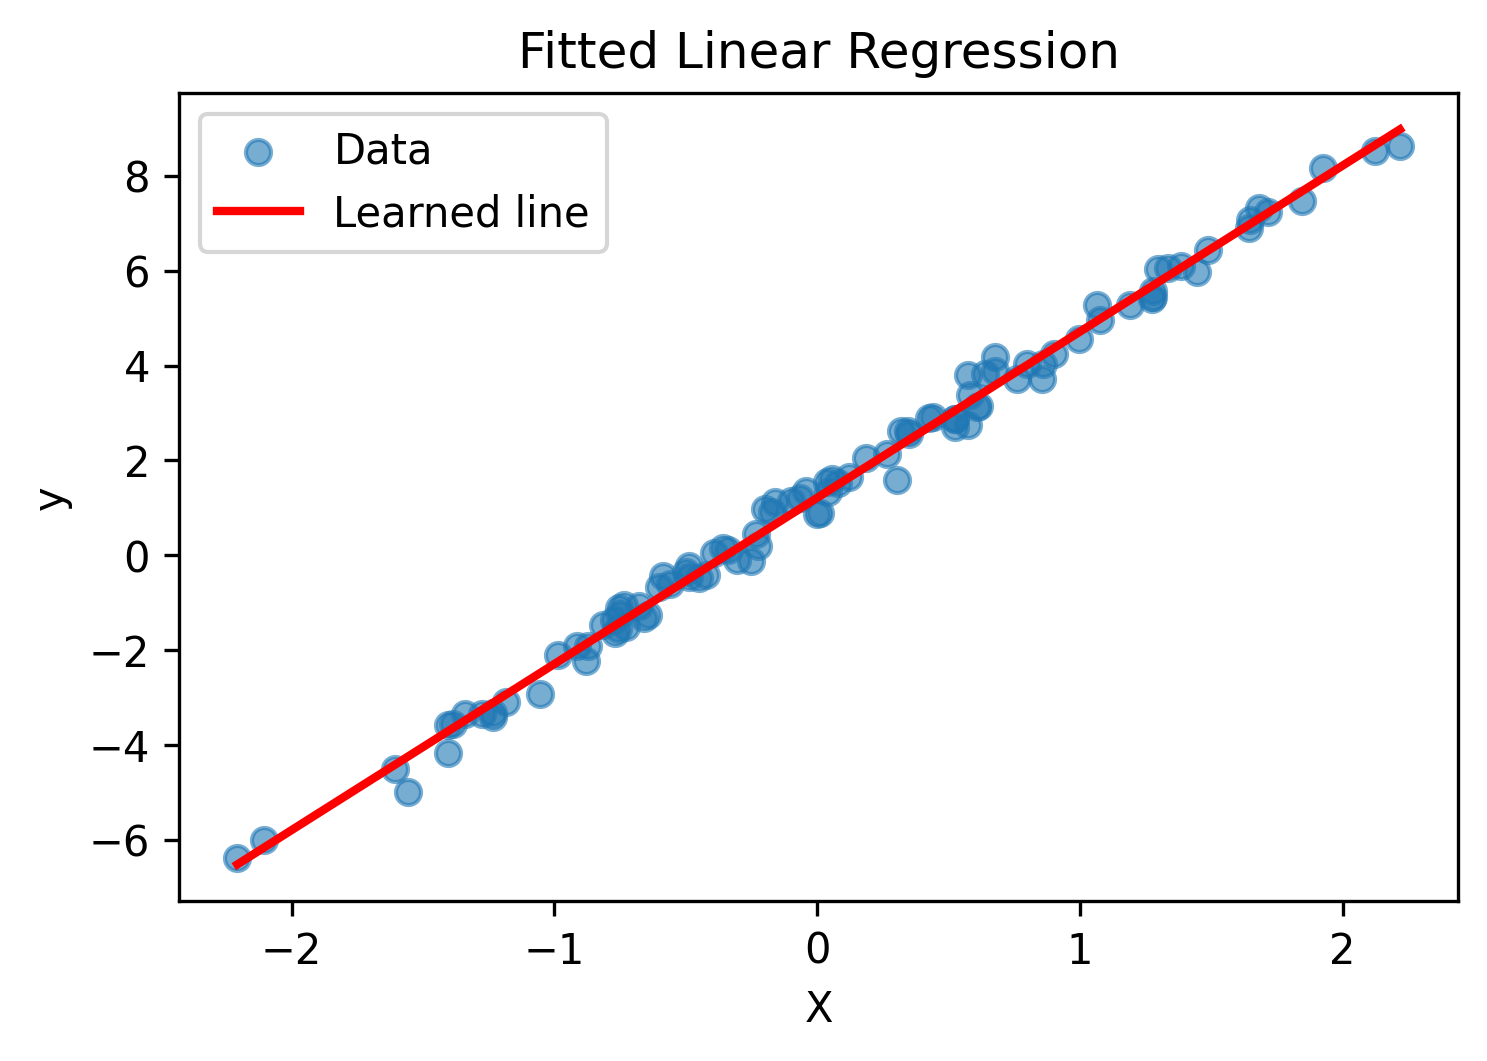

In [9]:
# Compute analytical OLS solution
X_with_intercept = torch.cat([torch.ones(n_samples, 1), X], dim=1)
beta_ols = torch.linalg.lstsq(X_with_intercept, y).solution
ols_bias, ols_weight = beta_ols[0].item(), beta_ols[1].item()

# Print comparison
print(f"{'Method':<12} {'Weight':>10} {'Bias':>10}")
print("-" * 34)
print(f"{'True':<12} {true_weight:>10.4f} {true_bias:>10.4f}")
print(f"{'OLS':<12} {ols_weight:>10.4f} {ols_bias:>10.4f}")
print(f"{'SGD':<12} {model.weight.item():>10.4f} {model.bias.item():>10.4f}")

# Plot regression line
with torch.no_grad():
    y_pred_final = model(X)

plt.scatter(X.numpy(), y.numpy(), alpha=0.6, label='Data')
# Sort for line plot
sort_idx = X.squeeze().argsort()
plt.plot(X[sort_idx].numpy(), y_pred_final[sort_idx].numpy(), 'r-', linewidth=2, label='Learned line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Fitted Linear Regression')
plt.show()

The SGD solution should closely match the OLS solution. Both may differ
slightly from the true values due to noise in the data.

**(2d)** Compare SGD with the Adam optimizer (`optim.Adam`). Retrain the
model with both optimizers and plot their loss curves. Which converges
faster?

**Solution:**

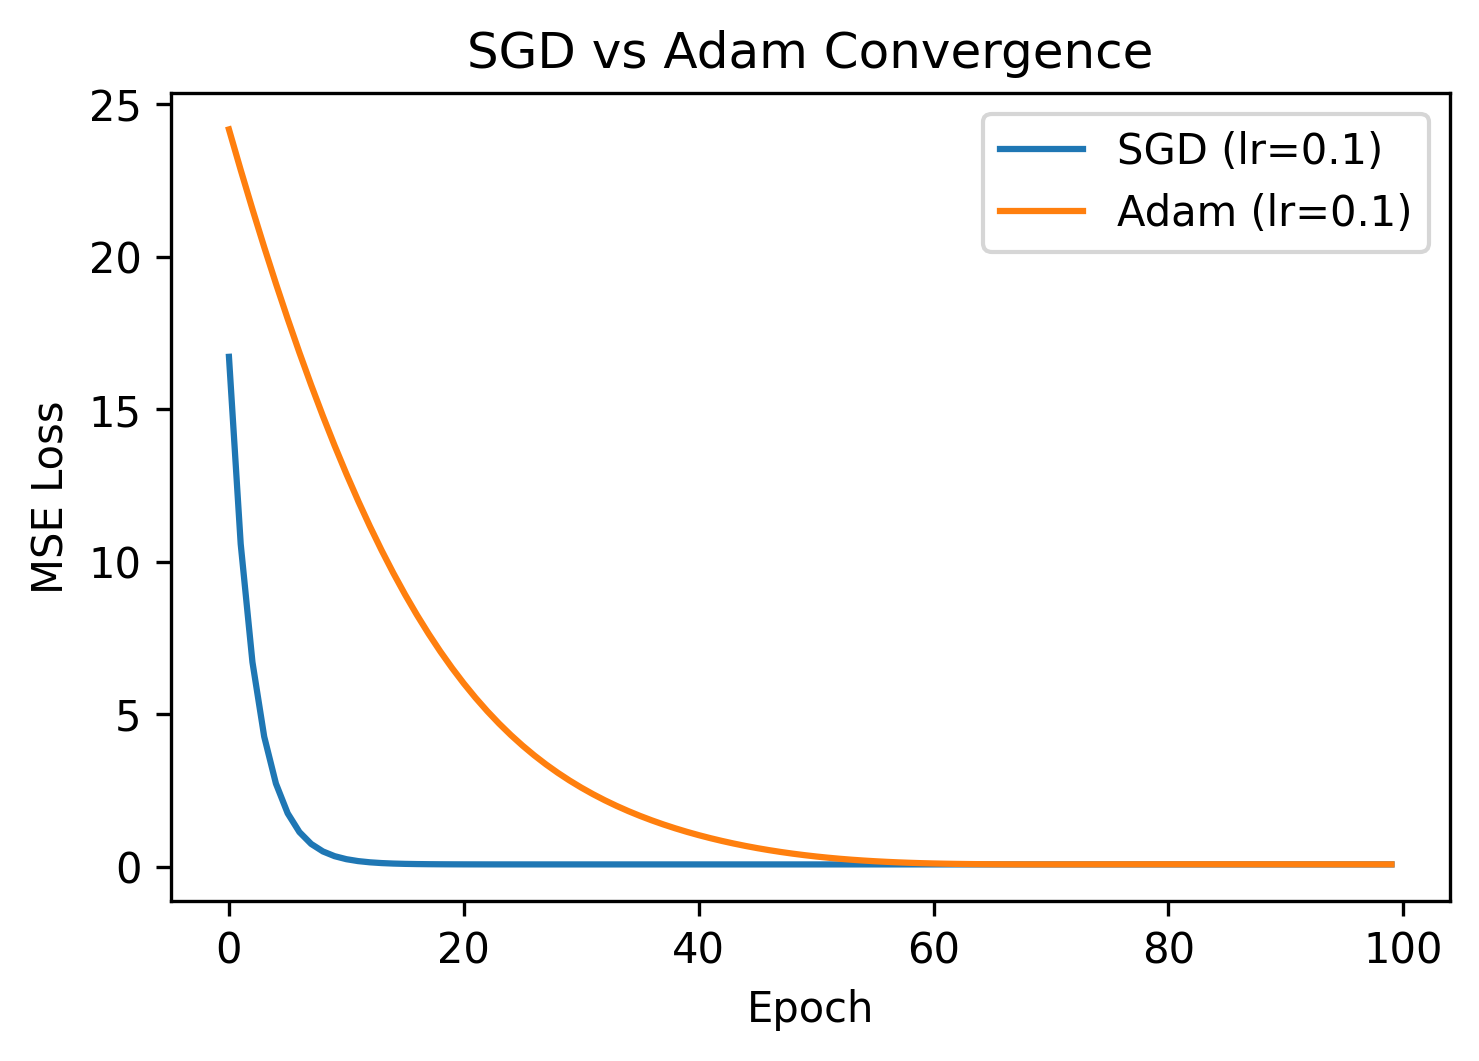

In [10]:
# Compare SGD vs Adam
def train_model(optimizer_class, lr, n_epochs=100):
    model = nn.Linear(1, 1)
    criterion = nn.MSELoss()
    optimizer = optimizer_class(model.parameters(), lr=lr)
    
    losses = []
    for epoch in range(n_epochs):
        y_pred = model(X)
        loss = criterion(y_pred, y)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    return losses

# Train with both optimizers
losses_sgd = train_model(optim.SGD, lr=0.1)
losses_adam = train_model(optim.Adam, lr=0.1)

# Plot comparison
plt.plot(losses_sgd, label='SGD (lr=0.1)')
plt.plot(losses_adam, label='Adam (lr=0.1)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('SGD vs Adam Convergence')
plt.show()

Adam typically converges faster because it adapts the learning rate for
each parameter.

# Problem 3: Multi-Layer Perceptron on MNIST

In this problem, you will build a multi-layer perceptron (MLP) to
classify handwritten digits from the MNIST dataset.

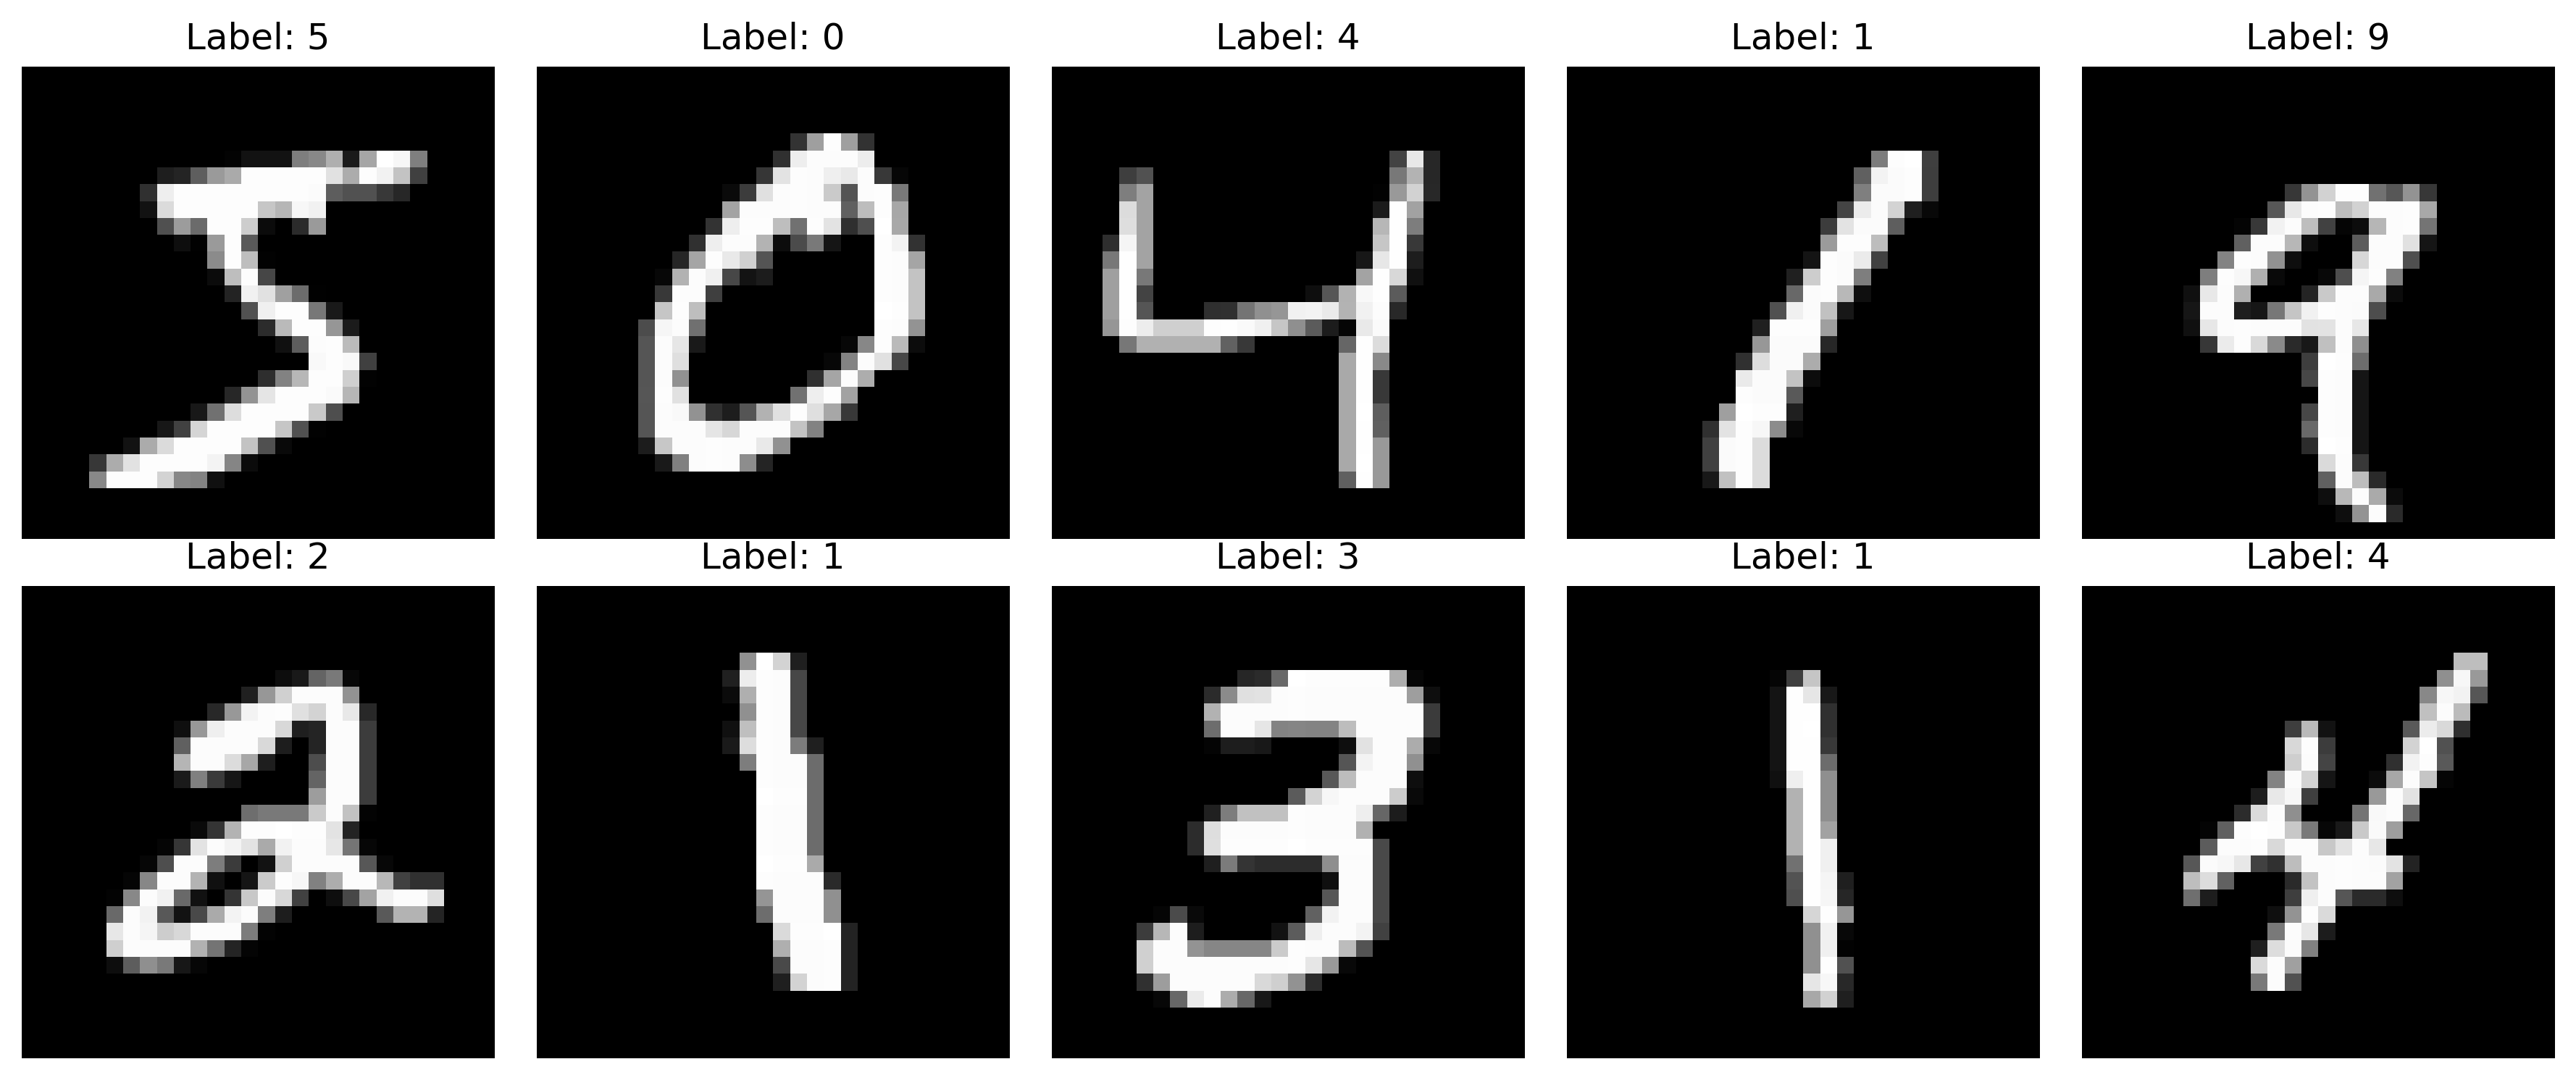

Training samples: 60000
Test samples: 10000
Image shape: torch.Size([1, 28, 28])

In [11]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Visualize some examples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    img, label = train_dataset[i]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.tight_layout()
plt.show()

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")

**(3a)** Build an MLP with the following architecture using
`nn.Sequential`:

-   Input: 784 features (28×28 flattened image)
-   Hidden layer 1: 256 units, ReLU activation
-   Hidden layer 2: 128 units, ReLU activation
-   Output: 10 units (one per digit class)

Print the model architecture and count the total number of parameters.

**Solution:**

In [12]:
# Define the MLP
model = nn.Sequential(
    nn.Flatten(),  # Flatten 28x28 to 784
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=10, bias=True)
)

Total parameters: 235,146
Trainable parameters: 235,146

**(3b)** Train the model:

-   Loss function: `nn.CrossEntropyLoss()` (combines softmax and
    negative log-likelihood)
-   Optimizer: `optim.Adam(model.parameters(), lr=0.001)`
-   Train for 5 epochs

For each epoch, compute and print:

1.  Average training loss
2.  Training accuracy
3.  Test accuracy

Use this helper function to compute accuracy:

In [13]:
def compute_accuracy(model, data_loader):
    model.eval()  # Sets evaluation mode (disables dropout/batchnorm training behavior)
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

**Solution:**

In [14]:
# Move model to device
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 5
train_losses = []
train_accs = []
test_accs = []

for epoch in range(n_epochs):
    model.train()  # Sets training mode (affects dropout/batchnorm), doesn't run training
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Compute metrics
    avg_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    test_acc = compute_accuracy(model, test_loader)
    
    train_losses.append(avg_loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
    print(f"Epoch {epoch+1}/{n_epochs}: Loss={avg_loss:.4f}, Train Acc={train_acc:.2f}%, Test Acc={test_acc:.2f}%")

Epoch 1/5: Loss=0.2319, Train Acc=93.06%, Test Acc=96.19%
Epoch 2/5: Loss=0.0937, Train Acc=97.11%, Test Acc=97.04%
Epoch 3/5: Loss=0.0655, Train Acc=97.94%, Test Acc=97.62%
Epoch 4/5: Loss=0.0512, Train Acc=98.35%, Test Acc=97.75%
Epoch 5/5: Loss=0.0410, Train Acc=98.64%, Test Acc=97.89%

**(3c)** Evaluate and visualize:

1.  Plot the training loss and accuracies over epochs
2.  Display 10 test images with their predicted labels. Mark incorrect
    predictions in red.
3.  What test accuracy did you achieve? How does this compare to random
    guessing (10%)?

**Solution:**

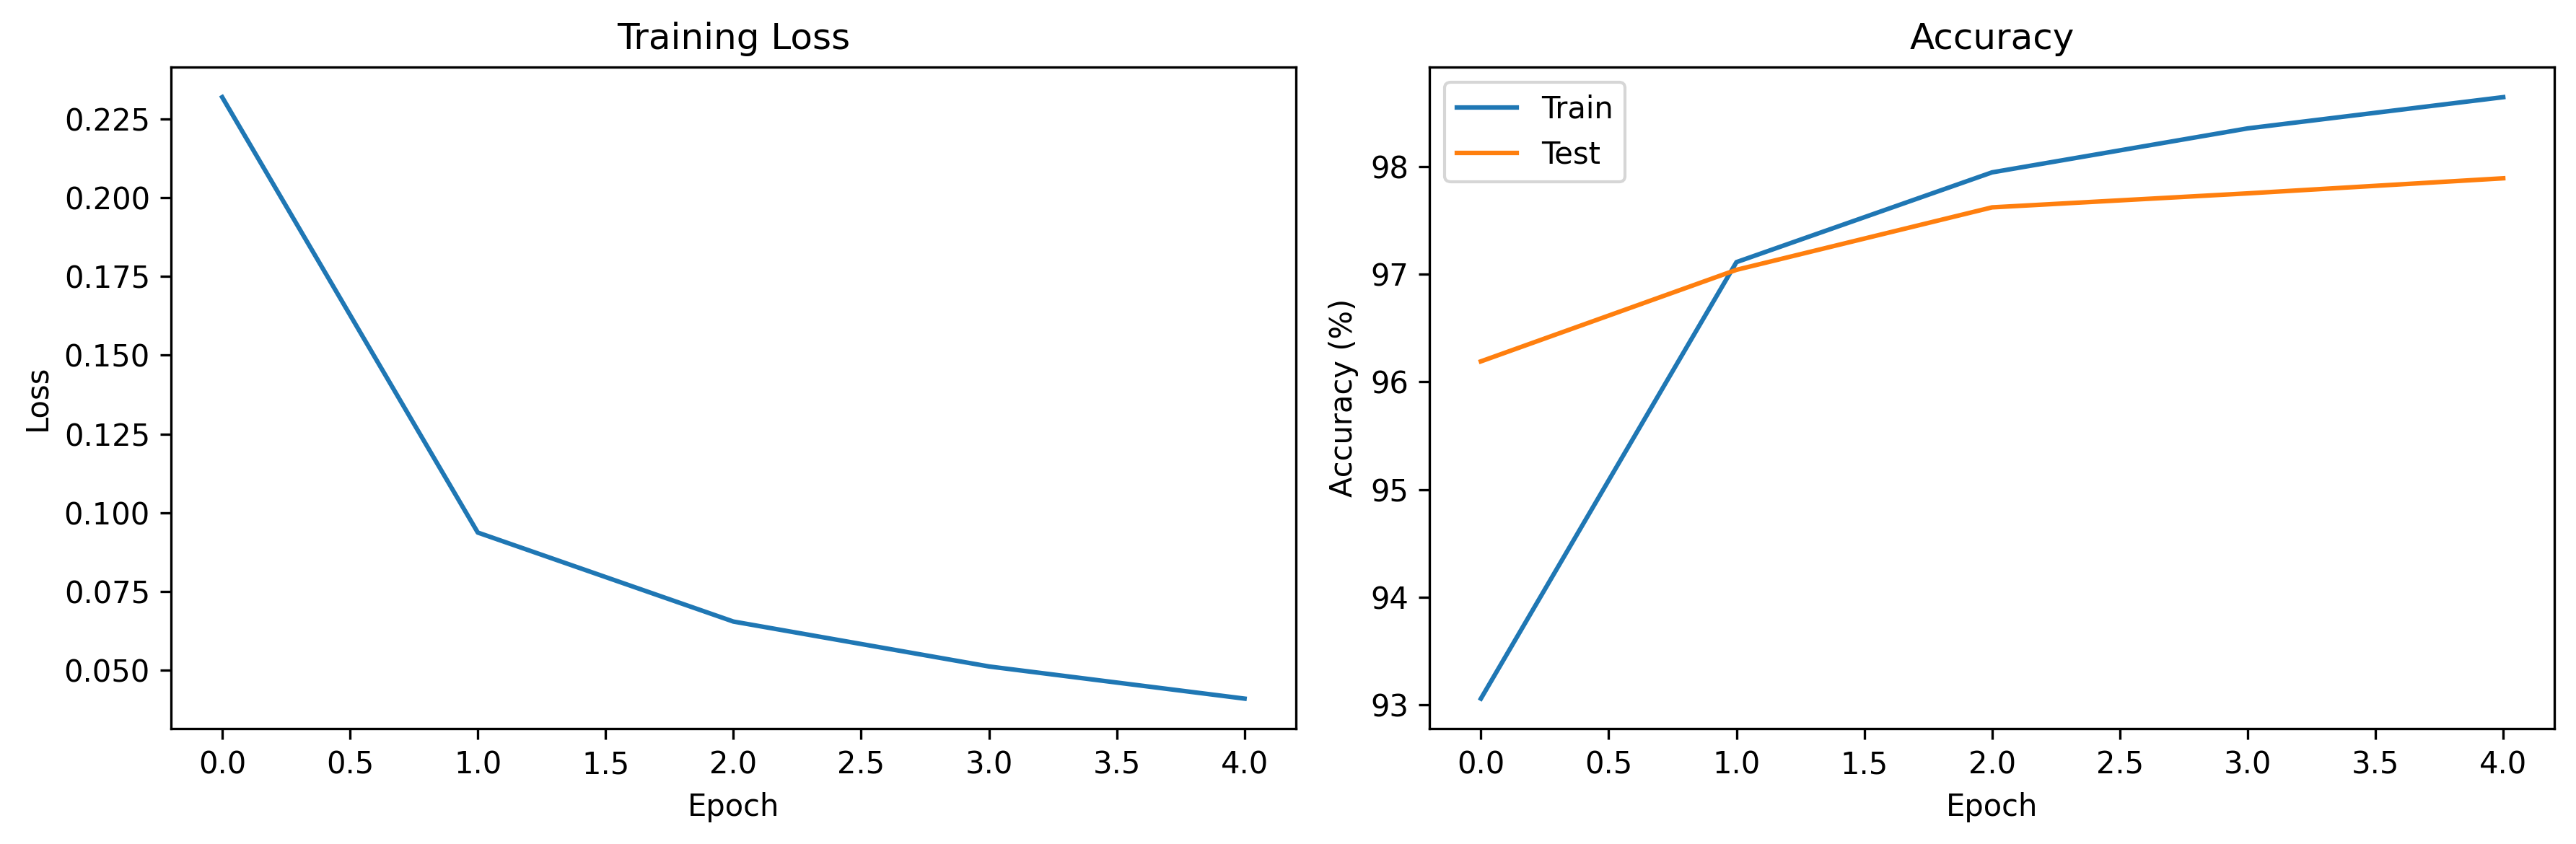

In [15]:
# Plot training curves
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(train_losses)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss')

axes[1].plot(train_accs, label='Train')
axes[1].plot(test_accs, label='Test')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

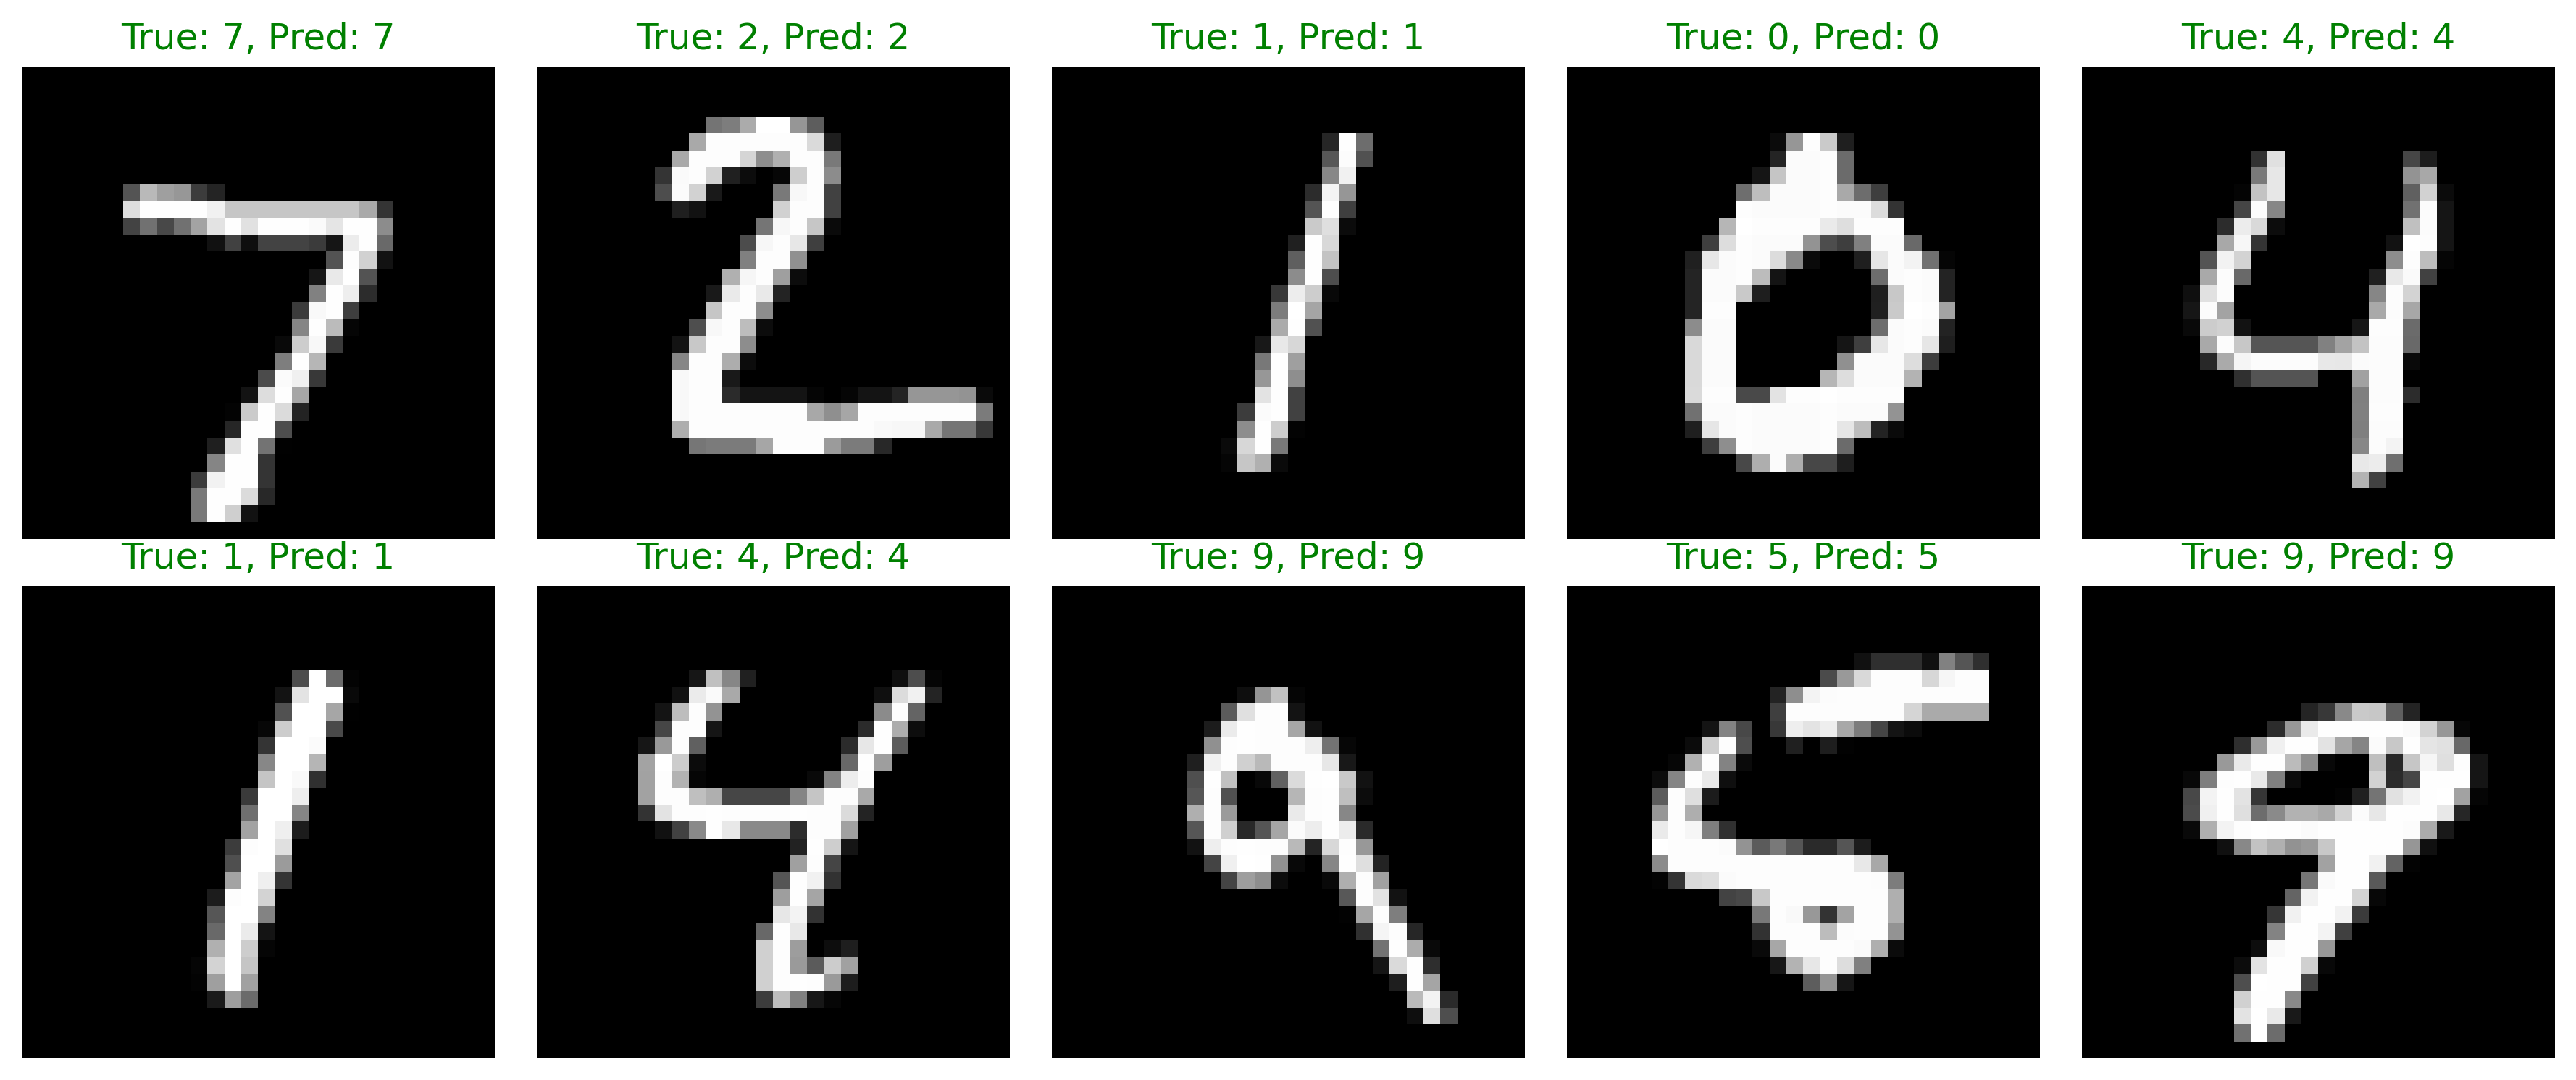


Final test accuracy: 97.89%
Random guessing would give: 10%
Improvement over random: 87.89 percentage points

In [16]:
# Visualize predictions
model.eval()
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

# Get some test images
test_images, test_labels = next(iter(test_loader))
test_images, test_labels = test_images[:10], test_labels[:10]

with torch.no_grad():
    outputs = model(test_images.to(device))
    _, predictions = torch.max(outputs, 1)
    predictions = predictions.cpu()

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i].squeeze(), cmap='gray')
    true_label = test_labels[i].item()
    pred_label = predictions[i].item()
    
    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f'True: {true_label}, Pred: {pred_label}', color=color)
    ax.axis('off')

plt.tight_layout()
plt.show()

print(f"\nFinal test accuracy: {test_accs[-1]:.2f}%")
print(f"Random guessing would give: 10%")
print(f"Improvement over random: {test_accs[-1] - 10:.2f} percentage points")